In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from random import seed,sample,randrange
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

In [3]:
X1 = pd.DataFrame([[-1,-1,-1],
     [-1,-1,1],
     [-1,1,-1],
     [-1,1,1],
     [1,-1,-1],
     [1,-1,1],
     [1,1,-1],
     [1,1,1]])
y = pd.DataFrame([1,-1,1,-1,1,-1,1,-1])
X=pd.DataFrame({"c1":X1[0],"c2":X1[1],"c3":X1[2]})

In [4]:
from keras.utils import to_categorical
y = to_categorical(y)

In [5]:
RandomState = 42
seed(21)

In [6]:
y


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [8]:
model = Sequential()
model.add(Dense(3, input_dim=3, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="relu"))
model.add(Dense(2, activation='softmax'))

In [9]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
None


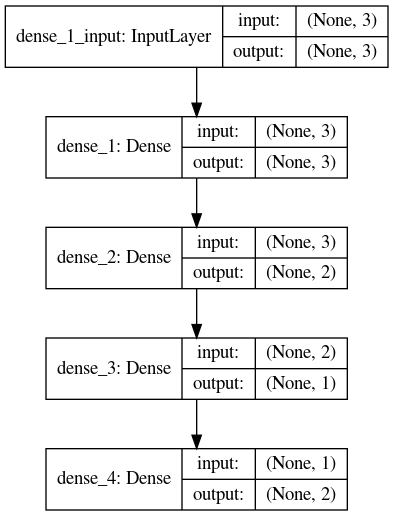

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
print("[INFO] training model...")
model.fit(X, y, epochs=5)

[INFO] training model...
Epoch 1/5
8/8 [==============================] - 1s 91ms/step - loss: 0.6891 - accuracy: 0.3750
Epoch 2/5
8/8 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 0s 602us/step - loss: 0.6868 - accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 0s 647us/step - loss: 0.6856 - accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 0s 486us/step - loss: 0.6844 - accuracy: 1.0000


In [13]:
scores = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 68ms/step


In [14]:
scores

[0.6846103072166443, 1.0]

In [27]:
for i in range(0,3):
    print("Weights layer:",i," =>",model.weights[i])

Weights layer: 0  => <tf.Variable 'dense_1/kernel:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.96052873,  0.09241586,  0.5889882 ],
       [ 0.7425442 , -0.6499851 ,  0.6049291 ],
       [ 0.63735414,  0.13175945,  0.88118213]], dtype=float32)>
Weights layer: 1  => <tf.Variable 'dense_1/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.00500467, -0.00499768,  0.00499916], dtype=float32)>
Weights layer: 2  => <tf.Variable 'dense_2/kernel:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.6717951 ,  0.7512468 ],
       [-1.0462297 , -0.7703324 ],
       [-0.94574285,  0.25759405]], dtype=float32)>
